In [38]:
from matplotlib import pyplot as plt
import cv2

In [47]:
# https://github.com/opencv/opencv/tree/master/data/haarcascades
FACE_CASCADE = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # cascade for the face.
EYE_CASCADE = cv2.CascadeClassifier('haarcascade_eye.xml') # cascade for the eyes.

def detect_eyes(gray, image): #  
    faces = FACE_CASCADE.detectMultiScale(gray, 1.3, 10)  # Second arg: scale, third arg: min neighbours (that also classify)
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 3)
        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = image[y:y+h, x:x+w] 
        eyes = EYE_CASCADE.detectMultiScale(roi_gray, 1.6, 5) 
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color,(ex, ey),(ex+ew, ey+eh), (0, 255, 0), 3)
    return image


In [48]:
def get_eyes_canvas(img_name):
    image = cv2.imread(img_name,-1) #-1 for color, 0 for graysale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    return detect_eyes(gray,image)

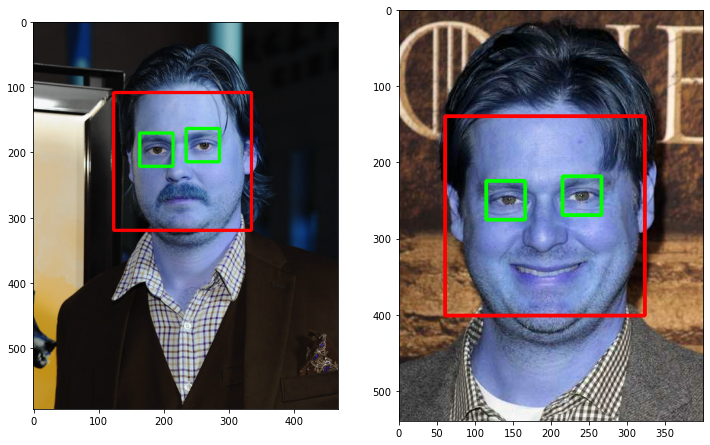

In [49]:

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(get_eyes_canvas('tim.jpg'))
plt.subplot(1,2,2)
plt.imshow(get_eyes_canvas('tim_smiling.jpg'))


plt.show()

Add smile detection

In [42]:
SMILE_CASCADE = cv2.CascadeClassifier('haarcascade_smile.xml')

# Defining a function that will do the detections
def smile_detect(gray, frame):
    faces = FACE_CASCADE.detectMultiScale(gray, 1.3, 10) # Second arg: scale, third arg: min neighbours (that also classify)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = EYE_CASCADE.detectMultiScale(roi_gray, 1.6, 4)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 3)
        smiles = SMILE_CASCADE.detectMultiScale(roi_gray, 1.8, 22)
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 3)
    return frame

In [43]:

def get_smile_canvas(img_name):
    image = cv2.imread(img_name,-1) #-1 for color, 0 for graysale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    return smile_detect(gray,image)

Note that I had to some manual tuning for both scaling and min_neighbouring to get the classifier to work

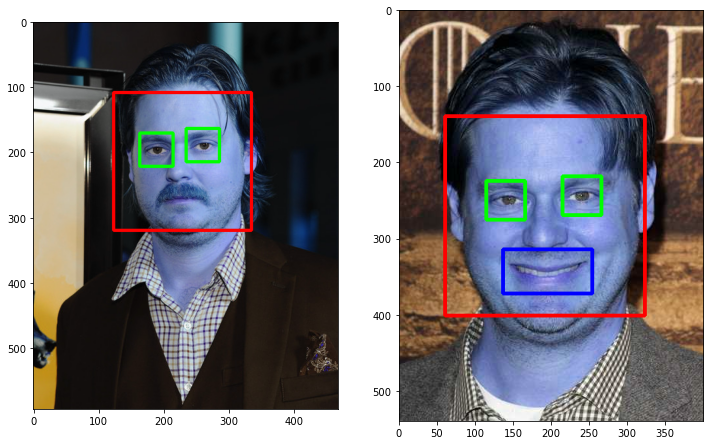

In [46]:
plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.imshow(get_smile_canvas('tim.jpg'))
plt.subplot(1,2,2)
plt.imshow(get_smile_canvas('tim_smiling.jpg'))

plt.show()

# notes

Sensetive with respect to parameters. Different persons seem to require different settings to work. Obviously also the case with the size of the image